# Spotifinder

Song recommender model based on Natural Language Processing.
Using TFIDF and Autoencoder or Latent Semantic Indexing.

Slimmed down model using autoencoder.

In [2]:
#libraries imported

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pickle
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
# NLP model used this 18k songs dataset
# Trim it down by taking out duplicate songs

spotify_songs = pd.read_csv(r'C:\Users\temsy\Documents\GitHub\Spotifinder_BU3\data\spotify_songs.csv')

In [6]:
spotify_songs.shape

(18454, 25)

In [7]:
#Data cleaning

def clean_data(data):
    #drop nulls in lyrics column
    data = data.dropna()
    
    #Only get songs with lyrics in English
    data = data[data['language']=='en']
    
    #Drop duplicates
    data = data.drop_duplicates(subset = ['track_name', 'track_artist'],
                                             keep = 'first')
    
    #Reduce features
    features = ['track_id', 'track_name', 'track_artist', 'lyrics']
    data = data[features]
    
    #Reset index
    data = data.reset_index()
    
    return data

In [8]:
df = clean_data(spotify_songs)

In [9]:
df.shape

(13726, 5)

In [ ]:
#Export new dataset to csv

df.to_csv('NLP_songs_data.csv', index=False)

In [ ]:
df = pd.read_csv('NLP_songs_data.csv')

In [ ]:
df.shape

In [18]:
df.head(10)

,index,track_id,track_name,track_artist,lyrics
0,1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu..."
1,2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U..."
2,3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...
3,4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...
4,5,00f9VGHfQhAHMCQ2bSjg3D,Soldier,James TW,"Hold your breath, don't look down, keep trying..."
5,6,00FROhC5g4iJdax5US8jRr,Satisfy You,Diddy,All I want is somebody who's gonna love me for...
6,7,00GfGwzlSB8DoA0cDP2Eit,Tender Lover,Babyface,Feels good Everybody Tender lover Tender love ...
7,8,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,"Don't run away, it's getting colder Our hearts..."
8,11,00HIh9mVUQQAycsQiciWsh,Limestone,Magic City Hippies,How many friends are you gonna set on fire? Ho...
9,13,00i2HU7TEzzftShjRrDSEF,Changes,2Pac,"I see no changes, wake up in the morning and I..."


# Create TF-IDF Model

In [10]:
#Create a function that gathers all the song lyrics into a list of strings

def gather_data(songs):
    data =[]
    for song in songs:
        data.append(df['lyrics'][df['track_id']==song])
    
    #Convert Series into a list of strings
    new_data = []

    for song in data:
        str_song = pd.Series(song).item()
        new_data.append(str_song)
        
    return new_data

In [11]:
#Gather all the songs in the dataframe

songs = df['track_id']

data = gather_data(songs)

In [12]:
type(data)

list

In [13]:
len(data)

#Now this is a corpus

13726

In [14]:
# Apply TD-IDF to the corpus 
# Turn this on once to create the dtm, 
# it will be saved in the next cell 

# Instantiate 
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2), min_df=0.03, 
                        max_df=0.25) 

# Create a vocabulary and get word counts per document 
dtm = tfidf.fit_transform(data) 

# Get feature names to use as dataframe column headers 
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names()) 
print(dtm.shape) 
dtm.head()

(13726, 418)


,act,afraid,ah,ain got,air,alive,alright,apart,arms,ask,...,wouldn,wrong,ya,yeah know,yeah oh,yeah yeah,years,yes,yo,young
0,0.0,0.0,0.0,0.0,0.0,0.448492,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.142765,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.226117,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.12472,0.123957,0.181594,0.0,0.0,0.000000,0.0


In [ ]:
# Serialize the dtm 
#Turn this on once to save the dtm 

dtm_filename = 'nlp_dtm.pkl' 
pickle.dump(dtm, open(dtm_filename, 'wb'))

In [ ]:
#Load and test the dtm

dtm_filename = 'nlp_dtm.pkl'

dtm = pickle.load(open(dtm_filename, 'rb'))

In [15]:
# Apply K Nearest Neighbors 
# Fit on DTM 

nn = NearestNeighbors(n_neighbors=6, algorithm='kd_tree') 
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', n_neighbors=6)

In [ ]:
#Serialize model 
#Turn this on once to save the model 

model_filename = 'nlp_model.pkl' 
pickle.dump(nn, open(model_filename, 'wb'))

In [23]:
#Load and test the model

model_filename = r'C:\Users\temsy\Documents\GitHub\Spotifinder_BU3\models\nlp_model.pkl'

loaded_model = pickle.load(open(model_filename, 'rb'))
# result = loaded_model.kneighbors([doc])
# print(result)

In [16]:
#function to get 5 nearest songs

def select_nearest_songs(artist, song):
    
    #translate artist, song into doc dtm.iloc[x].values
    artist_songs = df.loc[df['track_artist']==artist]
    selected_song = artist_songs.loc[artist_songs['track_name']==song]
    x = selected_song.index
    x = x[0]
    x = x.item()

    doc = dtm.loc[x].values
    result = loaded_model.kneighbors([doc], n_neighbors=6)
    
    rec_songs = {"artist":[], "song":[]};
    
    for i in range(5):
        song = result[1][0][1+i]

        #translate the loc into an artist and song title
        artist = df.loc[song]['track_artist']
        song = df.loc[song]['track_name']
        
        rec_songs['artist'].append(artist)
        rec_songs['song'].append(song)
    
    return rec_songs

In [33]:
select_nearest_songs('The Weeknd', 'Heartless')

{'artist': ['Crobot', 'DJ Snake', 'Tora', "Des'ree", 'Iggy Pop'],
 'song': ['Low Life',
  '4 Life',
  'Too Much',
  'Life - Radio Edit',
  'Lust For Life']}

In [25]:
select_nearest_songs("CeeLo Green", "Baby It's Cold Outside (feat. Christina Aguilera)")

{'artist': ['Ella Fitzgerald',
  'Crossfade',
  'Omarion',
  'Ralph Tresvant',
  'Ralph Tresvant'],
 'song': ["Baby It's Cold Outside",
  'Cold',
  'Ice Box',
  'Stone Cold Gentleman - Radio Version',
  "Stone Cold Gentleman (Rizz's Interlude)"]}

In [40]:
select_nearest_songs('Babyface', 'Tender Lover')

{'artist': ['Cheap Trick',
  'Cheap Trick',
  'Cheap Trick',
  'Letters To Cleo',
  'Apashe'],
 'song': ['I Want You To Want Me',
  'I Want You to Want Me - Live at Nippon Budokan, Tokyo, JPN - April 1978',
  'I Want You to Want Me',
  'I Want You To Want Me - Soundtrack',
  'Lacrimosa']}

# Compare Lyrics

In [26]:

#Fetch lyrics function

def get_lyrics(artist, song):
  songs_by_artist = df[['track_id','track_name']][df['track_artist'] == artist]
  song_id = songs_by_artist[songs_by_artist['track_name'] == song]
  song_id = song_id[:1] #This selects the first if there are more than one
  song_id = song_id['track_id']
  song_id = pd.Series(song_id).item()
  lyrics = df['lyrics'][df['track_id'] == song_id]
  lyrics = pd.Series(lyrics).item()
  return lyrics

In [27]:
#Print lyrics from both songs to compare

def compare_lyrics(artist, song):
    song_recs = select_nearest_songs(artist, song)
    
    rec_artist = song_recs['artist'][0]
    rec_song = song_recs['song'][0]
    
    lyrics1 = get_lyrics(artist, song)
    lyrics2 = get_lyrics(rec_artist, rec_song)
    
    return lyrics1, lyrics2

# Visualization 1: Word Cloud

In [28]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40,
        scale=3,
        random_state=37).generate(str(data))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

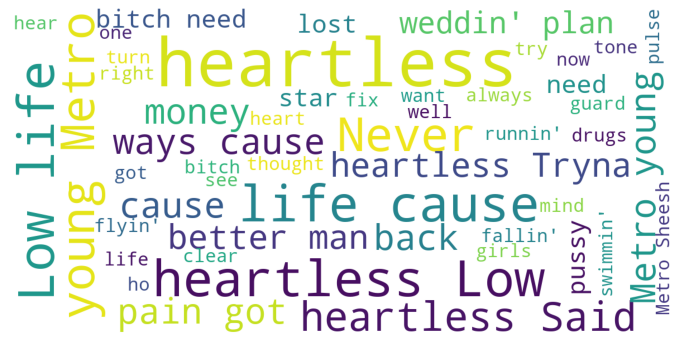

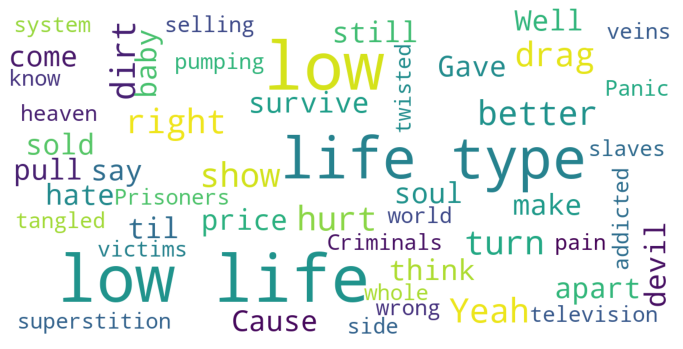

In [34]:
lyrics1, lyrics2 = compare_lyrics('The Weeknd', 'Heartless')

show_wordcloud(lyrics1)
show_wordcloud(lyrics2)

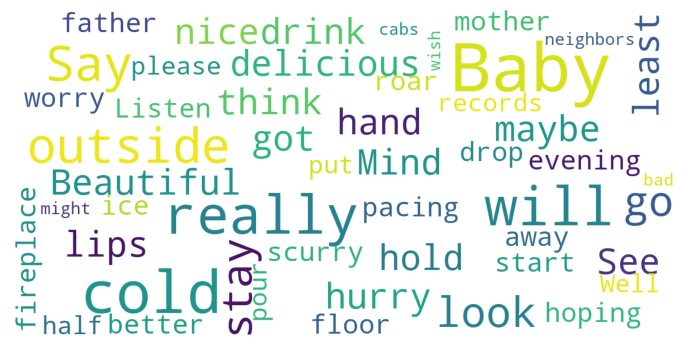

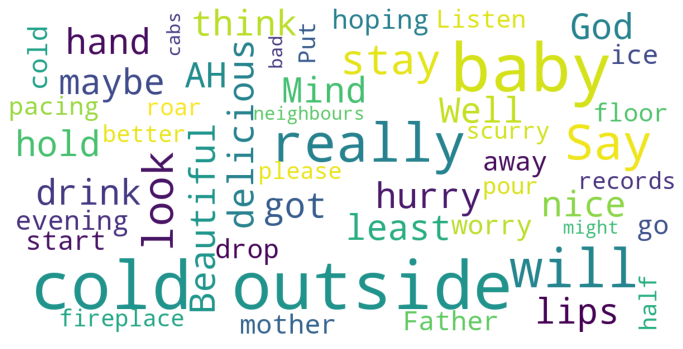

In [32]:
lyrics1, lyrics2 = compare_lyrics('CeeLo Green', "Baby It's Cold Outside (feat. Christina Aguilera)")

show_wordcloud(lyrics1)
show_wordcloud(lyrics2)

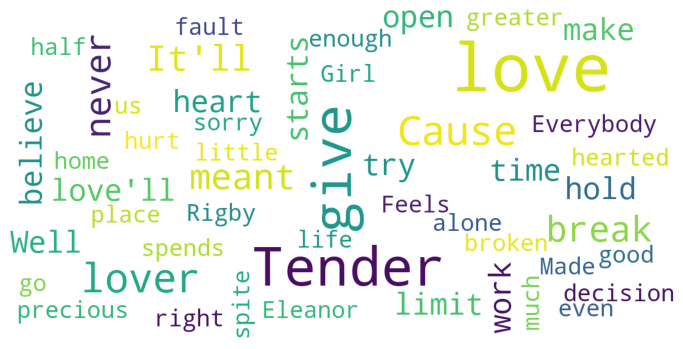

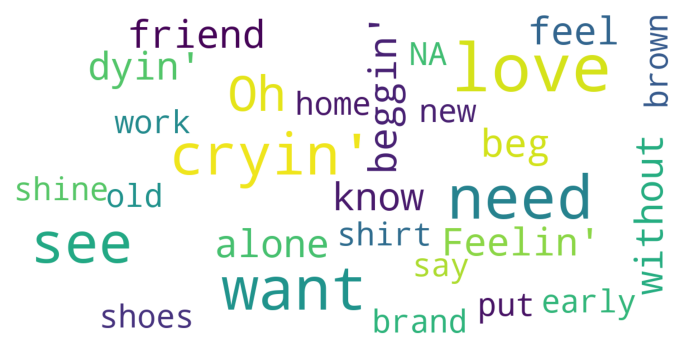

In [41]:
lyrics1, lyrics2 = compare_lyrics('Babyface', 'Tender Lover')

show_wordcloud(lyrics1)
show_wordcloud(lyrics2)